In [1]:
import pandas as pd
import pygad
import numpy

In [2]:
df= pd.read_csv('../data/products.csv')

In [3]:
df

,Product,Space,Price,Quantity
0,Refrigerator A,0.751000,999.90,3
1,Cell phone,0.000009,2199.12,2
2,TV 55,0.400000,4346.99,5
3,TV 50,0.290000,3999.90,5
4,TV 42,0.200000,2999.00,5
5,Notebook A,0.003500,2499.90,4
6,Ventilator,0.496000,199.90,12
7,Microwave A,0.042400,308.66,7
8,Microwave B,0.054400,429.90,7
9,Microwave C,0.031900,299.29,9


In [4]:
#form a list from the dataframe
my_list = df.values.tolist()
my_list_1 = []
#create a list from the above list by iteriting.....
for x in my_list:
  for i in range(x[3]):
    my_list_1.append(x[:3])

my_list_1

[['Refrigerator A', 0.751, 999.9],
 ['Refrigerator A', 0.751, 999.9],
 ['Refrigerator A', 0.751, 999.9],
 ['Cell phone', 8.99e-06, 2199.12],
 ['Cell phone', 8.99e-06, 2199.12],
 ['TV 55', 0.4, 4346.99],
 ['TV 55', 0.4, 4346.99],
 ['TV 55', 0.4, 4346.99],
 ['TV 55', 0.4, 4346.99],
 ['TV 55', 0.4, 4346.99],
 ['TV 50', 0.29, 3999.9],
 ['TV 50', 0.29, 3999.9],
 ['TV 50', 0.29, 3999.9],
 ['TV 50', 0.29, 3999.9],
 ['TV 50', 0.29, 3999.9],
 ['TV 42', 0.2, 2999.0],
 ['TV 42', 0.2, 2999.0],
 ['TV 42', 0.2, 2999.0],
 ['TV 42', 0.2, 2999.0],
 ['TV 42', 0.2, 2999.0],
 ['Notebook A', 0.0035, 2499.9],
 ['Notebook A', 0.0035, 2499.9],
 ['Notebook A', 0.0035, 2499.9],
 ['Notebook A', 0.0035, 2499.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.9],
 ['Ventilator', 0.496, 199.

In [5]:
data= pd.DataFrame(my_list_1, columns=[ 'Product','Space','Price'])

In [6]:
data

,Product,Space,Price
0,Refrigerator A,0.751000,999.90
1,Refrigerator A,0.751000,999.90
2,Refrigerator A,0.751000,999.90
3,Cell phone,0.000009,2199.12
4,Cell phone,0.000009,2199.12
...,...,...,...
72,Notebook C,0.527000,3999.00
73,Notebook C,0.527000,3999.00
74,Notebook C,0.527000,3999.00
75,Notebook C,0.527000,3999.00


In [7]:
space= df['Space'].to_list()

In [8]:
space

[0.751,
 8.99e-06,
 0.4,
 0.29,
 0.2,
 0.0035,
 0.496,
 0.0424,
 0.0544,
 0.0319,
 0.635,
 0.87,
 0.498,
 0.527]

### Linear Optimization Model with pygad

In [9]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = space # Function inputs.
desired_output = 1 # Function output.

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

In [10]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

Generation = 1
Fitness    = 5.361720906325314
Change     = 5.361720906325314
Generation = 2
Fitness    = 22.055287152963363
Change     = 16.69356624663805
Generation = 3
Fitness    = 131.30679530912028
Change     = 109.25150815615692
Generation = 4
Fitness    = 18.794000314295136
Change     = -112.51279499482514
Generation = 5
Fitness    = 4.893647744224485
Change     = -13.900352570070652
Generation = 6
Fitness    = 8.373304647580065
Change     = 3.47965690335558
Generation = 7
Fitness    = 28.022144455357783
Change     = 19.64883980777772
Generation = 8
Fitness    = 14.076033434014152
Change     = -13.946111021343631
Generation = 9
Fitness    = 27.462637967100843
Change     = 13.386604533086691
Generation = 10
Fitness    = 26.275393722628355
Change     = -1.1872442444724882
Generation = 11
Fitness    = 8.961499241069058
Change     = -17.313894481559295
Generation = 12
Fitness    = 33.06900055865696
Change     = 24.107501317587904
Generation = 13
Fitness    = 16.227404530555553
Change

### Testing for space value of 1

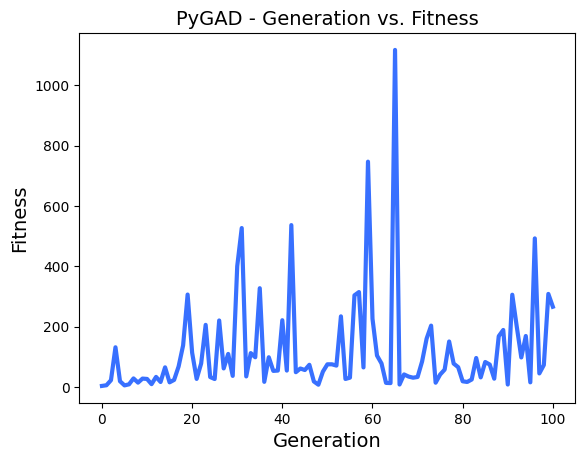

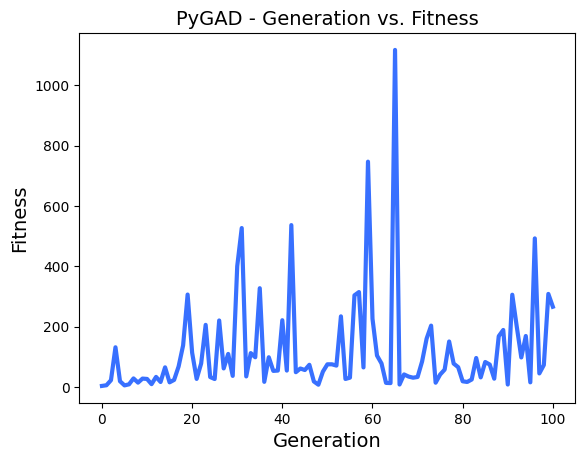

In [11]:
ga_instance.plot_fitness()

In [12]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [-1.26905303 -2.43884253 -0.45838301  2.87051133 -2.11455273  4.46596309
  2.25601898 -0.29414119 -1.26917574 -2.54862579  3.18062363 -3.5259498
  1.5803567   1.92067847]
Fitness value of the best solution = 265.81855220662214
Index of the best solution : 14


In [13]:
numpy.sum(solution*function_inputs)

0.9962390353376438

### Test for a space value of 2

In [14]:
function_inputs = space # Function inputs.
desired_output = 2 # Function output.
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

In [15]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

Generation = 1
Fitness    = 38.668982344174275
Change     = 38.668982344174275
Generation = 2
Fitness    = 38.668982344174275
Change     = 0.0
Generation = 3
Fitness    = 1750.4424297075784
Change     = 1711.773447363404
Generation = 4
Fitness    = 435.31791423204896
Change     = -1315.1245154755295
Generation = 5
Fitness    = 38.668982344174275
Change     = -396.6489318878747
Generation = 6
Fitness    = 38.668982344174275
Change     = 0.0
Generation = 7
Fitness    = 38.668982344174275
Change     = 0.0
Generation = 8
Fitness    = 38.668982344174275
Change     = 0.0
Generation = 9
Fitness    = 38.668982344174275
Change     = 0.0
Generation = 10
Fitness    = 38.668982344174275
Change     = 0.0
Generation = 11
Fitness    = 38.668982344174275
Change     = 0.0
Generation = 12
Fitness    = 160.04293723183363
Change     = 121.37395488765935
Generation = 13
Fitness    = 45.952332491336406
Change     = -114.09060474049723
Generation = 14
Fitness    = 3703.417495562339
Change     = 3657.46516307

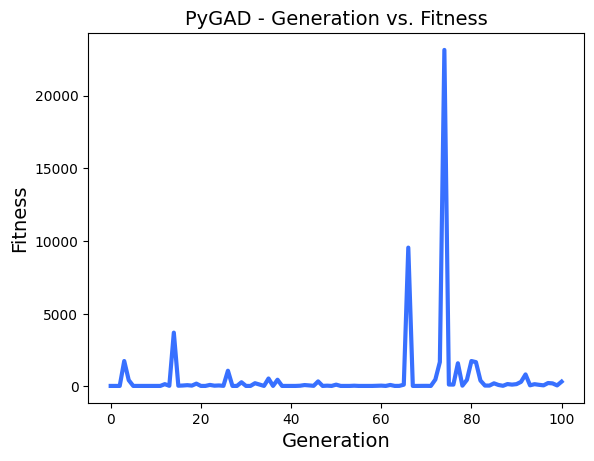

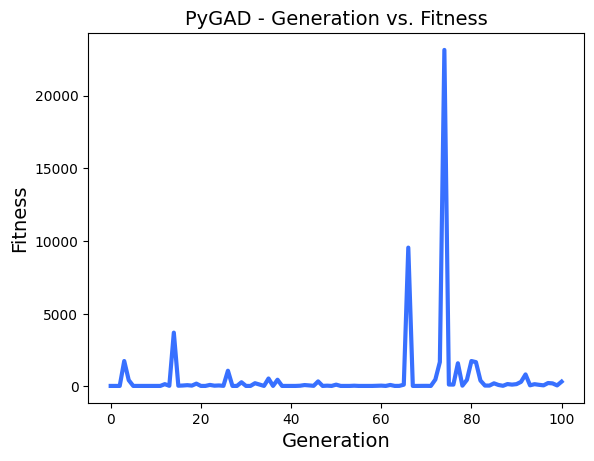

In [16]:
ga_instance.plot_fitness()

In [17]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [ 3.33242831  3.33175106 -2.20823493  0.49538157 -0.02174219 -1.46505778
  1.09088225 -2.22782157  2.73779473  1.76756443  3.56487056 -3.75864415
  2.92941772 -1.63384899]
Fitness value of the best solution = 332.9417227423159
Index of the best solution : 3


In [18]:
numpy.sum(solution*function_inputs)

1.9969974713591214

### Test for Space Value of 3

Generation = 1
Fitness    = 6.4144223351661545
Change     = 6.4144223351661545
Generation = 2
Fitness    = 3.49029802335704
Change     = -2.9241243118091145
Generation = 3
Fitness    = 5.42999589403308
Change     = 1.9396978706760404
Generation = 4
Fitness    = 6.898399932505458
Change     = 1.4684040384723778
Generation = 5
Fitness    = 13.590482136060135
Change     = 6.692082203554677
Generation = 6
Fitness    = 23.82355259843518
Change     = 10.233070462375046
Generation = 7
Fitness    = 13.762625056239727
Change     = -10.060927542195454
Generation = 8
Fitness    = 63.77052473155488
Change     = 50.00789967531515
Generation = 9
Fitness    = 12.878571961812705
Change     = -50.891952769742176
Generation = 10
Fitness    = 60.889739778039505
Change     = 48.0111678162268
Generation = 11
Fitness    = 65.60567846221191
Change     = 4.715938684172407
Generation = 12
Fitness    = 87.53344048105664
Change     = 21.92776201884473
Generation = 13
Fitness    = 198.77502079776576
Change     = 

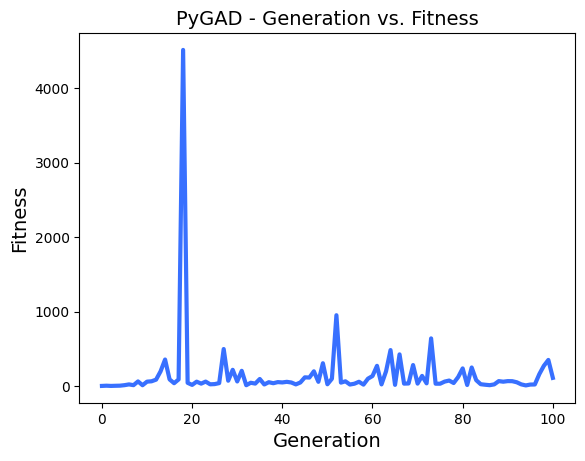

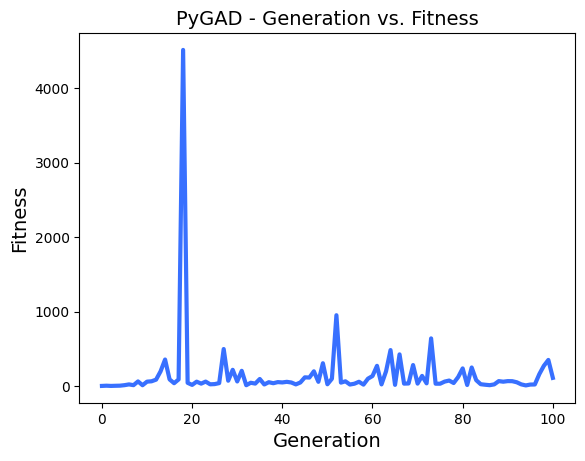

In [19]:
function_inputs = space # Function inputs.
desired_output = 3 # Function output.
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)
# Running the GA to optimize the parameters of the function.
ga_instance.run()
ga_instance.plot_fitness()

In [20]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [-1.5256012  -2.78955483  2.26247926  2.37075953 -3.91980505  0.46446963
  3.24450486  2.64600641 -3.93814246 -0.72109514 -0.74833692  3.69541374
  0.33175199 -2.01639859]
Fitness value of the best solution = 111.57813891305679
Index of the best solution : 3


In [21]:
numpy.sum(solution*function_inputs)

2.99103867091169

### Test for Space Value of 4

Generation = 1
Fitness    = 1.9059614367070055
Change     = 1.9059614367070055
Generation = 2
Fitness    = 18.55351395717461
Change     = 16.647552520467602
Generation = 3
Fitness    = 60.20933557195631
Change     = 41.6558216147817
Generation = 4
Fitness    = 7.823975519266074
Change     = -52.38536005269024
Generation = 5
Fitness    = 5.149164819681437
Change     = -2.6748106995846364
Generation = 6
Fitness    = 134.42780484443475
Change     = 129.27864002475332
Generation = 7
Fitness    = 3.2880054657299906
Change     = -131.13979937870477
Generation = 8
Fitness    = 163.64469536639575
Change     = 160.35668990066577
Generation = 9
Fitness    = 30.928161982995437
Change     = -132.7165333834003
Generation = 10
Fitness    = 183.38568134629656
Change     = 152.45751936330112
Generation = 11
Fitness    = 11.526702777912583
Change     = -171.85897856838398
Generation = 12
Fitness    = 53.65280229676495
Change     = 42.12609951885237
Generation = 13
Fitness    = 13.548710927929111
Change

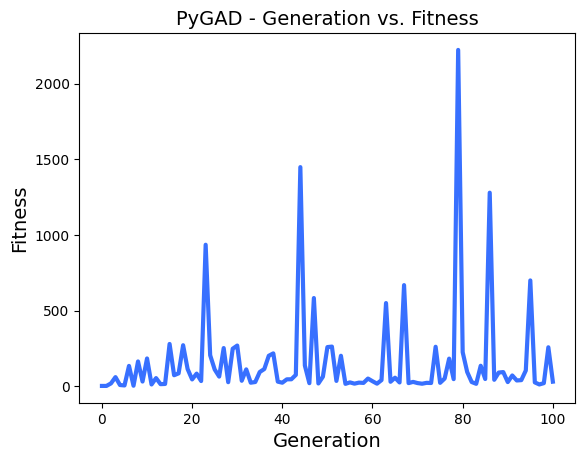

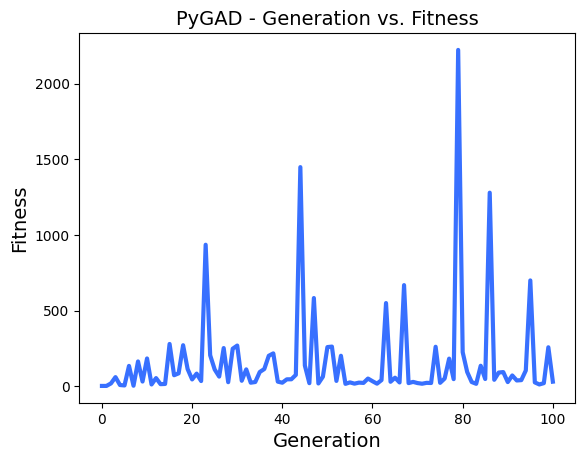

In [22]:
function_inputs = space # Function inputs.
desired_output = 4 # Function output.
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)
# Running the GA to optimize the parameters of the function.
ga_instance.run()
ga_instance.plot_fitness()

In [23]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [ 4.6287888   2.32117569  1.22202126  2.31472082 -2.40706493 -2.71938173
 -1.55364942  1.00457424 -0.1651374   2.25826607 -2.48871546  0.16899753
  3.40764091  0.54865167]
Fitness value of the best solution = 30.060585954965898
Index of the best solution : 10


In [24]:
numpy.sum(solution*function_inputs)

4.033265151281885

### Test for space Value of 5

Generation = 1
Fitness    = 11.961063042937585
Change     = 11.961063042937585
Generation = 2
Fitness    = 11.961063042937585
Change     = 0.0
Generation = 3
Fitness    = 15.705680081358512
Change     = 3.7446170384209267
Generation = 4
Fitness    = 50.36591702889447
Change     = 34.660236947535964
Generation = 5
Fitness    = 111.72491576426552
Change     = 61.358998735371046
Generation = 6
Fitness    = 43.15329838459511
Change     = -68.57161737967041
Generation = 7
Fitness    = 364.58059067150873
Change     = 321.4272922869136
Generation = 8
Fitness    = 3917.499343097676
Change     = 3552.9187524261674
Generation = 9
Fitness    = 97.48668038399968
Change     = -3820.0126627136765
Generation = 10
Fitness    = 122.74980224959867
Change     = 25.26312186559899
Generation = 11
Fitness    = 188.8545850769198
Change     = 66.10478282732112
Generation = 12
Fitness    = 119.1042051087152
Change     = -69.75037996820458
Generation = 13
Fitness    = 162.86713219204492
Change     = 43.76292708

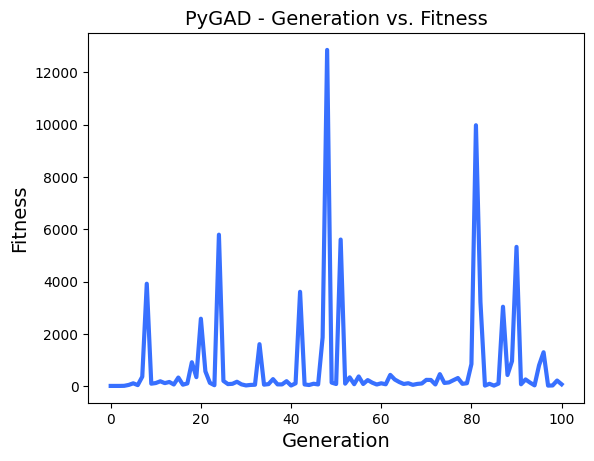

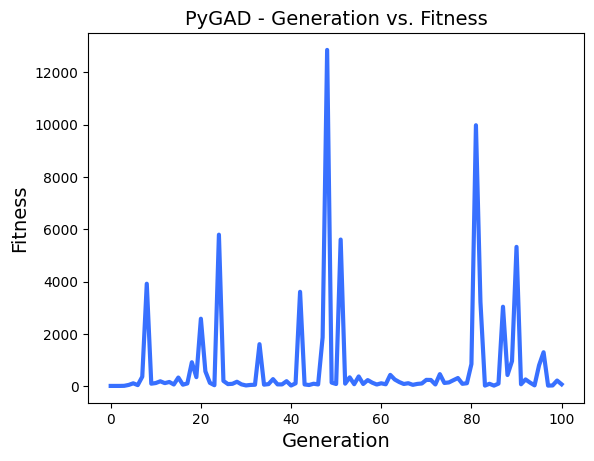

In [25]:
function_inputs = space # Function inputs.
desired_output = 5 # Function output.
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)
# Running the GA to optimize the parameters of the function.
ga_instance.run()
ga_instance.plot_fitness()

In [26]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [ 0.12229539 -1.05643554  0.68386557 -0.37490729 -2.04798609  0.34703922
  3.16366112  1.77731798  0.50505631  0.50626013  1.95570868  2.89556578
  2.38200548 -2.84101204]
Fitness value of the best solution = 73.93960269106512
Index of the best solution : 3


In [27]:
numpy.sum(solution*function_inputs)

4.9864764480196735